In [3]:
import pandas as pd
import numpy as np

In [4]:
#importing visualization tool matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Global Land Temperatures by Country Data
### Getting sense of Data

In [5]:
global_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [6]:
print global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 22.0+ MB
None


In [7]:
#reading global surface land temperature
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


#### 1. Dropping NAN data

In [8]:
# dropping NaN values
global_monthly_temp = global_temp.dropna()
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [9]:
global_monthly_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
dt                               544811 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    544811 non-null float64
Country                          544811 non-null object
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


#### 2. Extracting Year information

In [10]:
#converting string date to date format
global_monthly_temp['dt'] = pd.to_datetime(global_monthly_temp['dt'], format="%Y-%m-%d")



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
#[x.date() for x in global_monthly_temp['dt']]
global_monthly_temp.loc[:, 'Year'] = [x.year for x in global_monthly_temp['dt']]

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01 00:00:00,4.384,2.294,Åland,1743
5,1744-04-01 00:00:00,1.530,4.680,Åland,1744
6,1744-05-01 00:00:00,6.702,1.789,Åland,1744
7,1744-06-01 00:00:00,11.609,1.577,Åland,1744
8,1744-07-01 00:00:00,15.342,1.410,Åland,1744


#### 3. Finding world global yearly average
STEP 1: dropping data that have less than or equal to 6 entries which may not be a valid representation of that countries average. 

In [13]:
filtered_avg = global_monthly_temp.groupby(['Country','Year']).filter(lambda x: len(x) > 6)

In [14]:
filtered_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543398 entries, 5 to 577460
Data columns (total 5 columns):
dt                               543398 non-null datetime64[ns]
AverageTemperature               543398 non-null float64
AverageTemperatureUncertainty    543398 non-null float64
Country                          543398 non-null object
Year                             543398 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.9+ MB


In [15]:
filtered_global_yearly_average = filtered_avg.groupby('Year').mean().reset_index()

In [16]:
filtered_global_yearly_average.head(15)

,Year,AverageTemperature,AverageTemperatureUncertainty
0,1744,9.837898,2.136303
1,1750,9.129353,2.103795
2,1751,9.167388,2.053218
3,1753,8.870821,3.746918
4,1754,8.822019,3.413858
5,1755,8.530536,4.450229
6,1756,9.179886,4.309577
7,1757,8.993332,5.601266
8,1758,8.130371,5.804910
9,1759,9.261258,5.617140


STEP 2: Plotting the yearly global average temperature in Celcius which shows drastic increase at the first glance

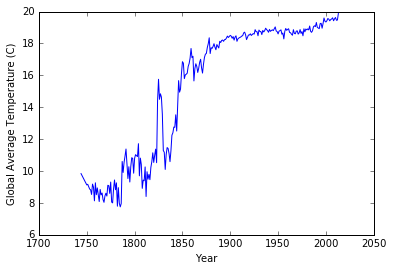

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(filtered_global_yearly_average['Year'], filtered_global_yearly_average['AverageTemperature'])
ax.set_xlabel("Year")
ax.set_ylabel("Global Average Temperature (C)")

STEP 3: Checking how many countries data were recorded each year

In [18]:
#Finding for each year, the number of countries data. 
nCountries = filtered_avg.groupby('Year')['Country'].apply(lambda x: len(x.unique())).reset_index()
nCountries.describe()

,Year,Country
count,264.000000,264.000000
mean,1881.469697,172.534091
std,76.407596,78.286636
min,1744.000000,50.000000
25%,1815.750000,78.500000
50%,1881.500000,223.000000
75%,1947.250000,240.500000
max,2013.000000,242.000000


STEP 3: including #countries data considered each year to the plot.

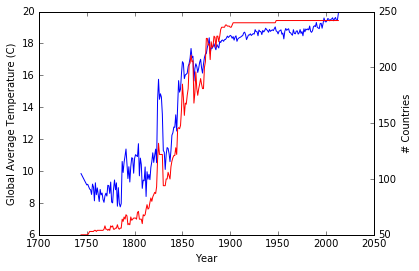

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(filtered_global_yearly_average['Year'], filtered_global_yearly_average['AverageTemperature'] )
ax.set_xlabel("Year")
ax.set_ylabel("Global Average Temperature (C)")

#adding secondary x-axis
ax2 = ax.twinx()
ax2.plot(nCountries['Year'], nCountries['Country'], 'r')
ax2.set_ylabel("# Countries")

STEP 4: Considering only the portion of data having largest consistent number of countries.

In [22]:
nCountries[nCountries.Country > 220].head(15)
# The cut off for the greatest number of countries is 1891. 
# Lets filter data only from 1891 till date to see effect of global warming 

,Year,Country
125,1875,226
126,1876,226
128,1878,221
130,1880,223
133,1883,228
134,1884,227
136,1886,228
137,1887,228
138,1888,223
139,1889,228


#### 4. Analysis of global temperature since 1891

In [81]:
global_temp_1891onwards = filtered_global_yearly_average[filtered_global_yearly_average.Year > 1891]
global_temp_1891onwards.head(10)

,Year,AverageTemperature,AverageTemperatureUncertainty
142,1892,18.215351,0.786973
143,1893,18.135380,0.779684
144,1894,18.240001,0.739777
145,1895,18.250662,0.722735
146,1896,18.341112,0.755512
147,1897,18.463942,0.767425
148,1898,18.376058,0.787518
149,1899,18.442159,0.733981
150,1900,18.508326,0.747565
151,1901,18.460926,0.772851


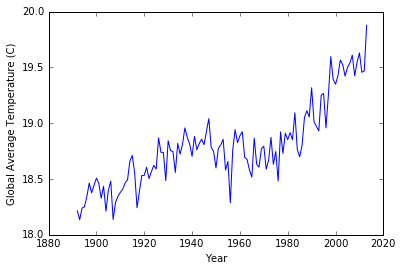

In [82]:
# plotting global temperature
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(global_temp_1891onwards['Year'], global_temp_1891onwards['AverageTemperature'] )
ax.set_xlabel("Year")
ax.set_ylabel("Global Average Temperature (C)")
# Global temperature has steadily increased by less than 2 degree celcius

NOTES:
1. separate temperatures from 1870 till date for further analysis
2. Get USA data and analyze 
3. Get California data and analyze by months to see which months the change is more evident over the years
4. Analyze global land and ocean temperatures

#### 5. Extracting yearly average of USA

In [85]:
usa_temp = filtered_avg[filtered_avg.Country=="United States"]
usa_temp.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
554884,1769-01-01 00:00:00,-3.952,4.856,United States,1769
554885,1769-02-01 00:00:00,-2.684,3.311,United States,1769
554886,1769-03-01 00:00:00,1.828,3.884,United States,1769
554887,1769-04-01 00:00:00,8.843,3.482,United States,1769
554888,1769-05-01 00:00:00,15.724,4.795,United States,1769


In [87]:
usa_yearly_temp = usa_temp.groupby('Year').mean().reset_index()
usa_yearly_temp.head(5)

,Year,AverageTemperature,AverageTemperatureUncertainty
0,1769,10.446500,3.693375
1,1775,9.499167,2.755083
2,1776,8.110000,2.962091
3,1777,8.304750,2.670083
4,1782,7.606429,3.183286


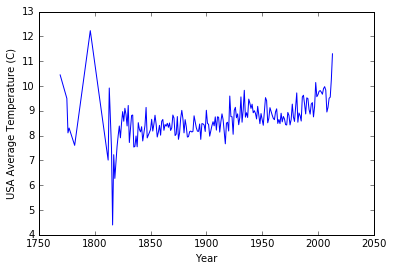

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(usa_yearly_temp['Year'], usa_yearly_temp['AverageTemperature'] )
ax.set_xlabel("Year")
ax.set_ylabel("USA Average Temperature (C)")

#### Removing discrepencies in data from begin till 1830

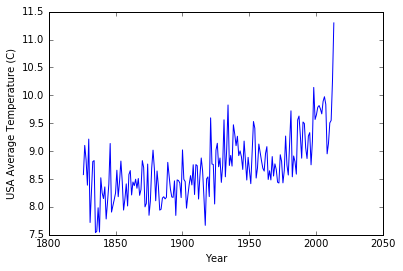

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(usa_yearly_temp.Year[usa_yearly_temp.Year > 1825], usa_yearly_temp.AverageTemperature[usa_yearly_temp.Year > 1825])
ax.set_xlabel("Year")
ax.set_ylabel("USA Average Temperature (C)")

## Global Land and Sea Temperatures Data
### Getting sense of Data

In [24]:
global_land_ocean_temp = pd.read_csv("GlobalTemperatures.csv")

In [25]:
global_land_ocean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 249.4+ KB


In [26]:
global_land_ocean_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping NAN values

In [27]:
global_land_ocean_temp.dropna(axis=0, inplace=True)